# Toxic Comment Classification

Build a model that predicts the type of toxicities for online comments

### Dataset
The dataset consists of a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are toxic, severe_toxic, obscene, threat, insult and identity_hate.

In [319]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import pandas as pd

### Text Operations on Comments

In [320]:
class TextOperation:
    _text = ""
    
    def __init__(self):
        #To do
        self._text = ""
        
    def lower_case(self, txt):
        return " ".join(word.lower() for word in txt.split())
    
    def remove_punctuation(self, txt):
        return txt.replace('[^\w\s]','')
    
    def remove_stopwords(self, txt):
        stop = stopwords.words('english')
        return " ".join(word for word in txt.split() if word not in stop)
    
    def remove_commonwords(self, txt):
        freq = pd.Series(txt.split()).value_counts()[:2]
        freq = list(freq.index)
        return " ".join(word for word in txt.split() if word not in freq)
    
    def remove_rarewords(self, txt):
        freq = pd.Series(txt.split()).value_counts()[-2:]
        freq = list(freq.index)
        return " ".join(word for word in txt.split() if word not in freq)
    
    def correct_spelling(self, txt):
        return str(TextBlob(txt).correct())
    
    def lemmatize(self, txt):
        return " ".join([Word(word).lemmatize() for word in txt.split()])

In [321]:
import TextOperation as to
from enum import Enum

In [322]:
class Operations(Enum):
    LOWER = "lower"
    PUNCTUATION = "punctuation"
    STOPWORDS = "stopwords"
    CWORDS = "commonwords" 
    RWORDS = "rarewords"
    SPELL = "correctspelling"
    LEMMA = "lemmatization"

### Preprocess the toxic comments

In [323]:
class BasicPreprocessor:
    _data_frame = pd.DataFrame({'A' : []})
    _interim_frame = pd.DataFrame({'A' : []})
    _column = ""
    _textop_ref = to.TextOperation()

    def __init__(self, df, col):
        self._data_frame = df
        self._interim_frame = df
        self._column = col
        print(self._column)
    
    def choose_dataframe(self, df, is_interim):
        temp = pd.DataFrame({'A' : []})
        if (not (df.empty)):
            temp = df
        elif (is_interim == True):
            temp = self._interim_frame
        else:
            temp = self._data_frame
        return temp
    
    def select_operation(self, df, op):
        if (Operations.LOWER == op):
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.lower_case(str_))
        elif (Operations.PUNCTUATION == op):
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.remove_punctuation(str_))
        elif (Operations.STOPWORDS == op):
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.remove_stopwords(str_))
        elif (Operations.CWORDS == op):                
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.remove_commonwords(str_))
        elif (Operations.RWORDS == op):                
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.remove_rarewords(str_))
        elif (Operations.SPELL == op):                
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.correct_spelling(str_))
        elif (Operations.LEMMA == op):                
                return df.loc[:, self._column].apply(
                        lambda str_: self._textop_ref.lemmatize(str_))


    
    def perform_operation(self, operation, df, is_interim, change_interim):
        temp = self.choose_dataframe(df, is_interim)
        temp.loc[:, self._column] = self.select_operation(temp, operation)
        print(temp.loc[:, self._column])
        if (change_interim == True):
            self._interim_frame = temp
        return temp


### Process dataset

In [328]:
import os
#import BasicPreprocessor as bp

def do_basic_preprocess(filePath, interim_filepath):
    trainData = pd.read_csv(filePath)
    print("raw")
    print(trainData.head())
    print('\n\n')
    ref_basic = BasicPreprocessor(trainData, "comment_text")
    tdf = pd.DataFrame({'A' : []})
    ref_basic.perform_operation(Operations.LOWER, tdf, True, True)
    ref_basic.perform_operation(Operations.PUNCTUATION, tdf, True, True)
    ref_basic.perform_operation(Operations.STOPWORDS, tdf, True, True)
#    ref_basic.perform_operation(Operations.CWORDS, tdf, True, True)
#    ref_basic.perform_operation(Operations.RWORDS, tdf, True, True)
#    temp_df = ref_basic.perform_operation(Operations.SPELL, tdf, True, True)
    temp_df = ref_basic.perform_operation(Operations.LEMMA, tdf, True, True)
    temp_df.set_index('id')
    temp_df.to_csv(interim_filepath, sep=',', encoding='utf-8')
    print("processed")
    temp_df.head()

In [329]:
train_filepath = "train.csv"
processed_filepath = "processed.csv"
do_basic_preprocess(train_filepath, processed_filepath)

raw
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  



comment_text
0         explanation why the edits made under my userna...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm re

0         explanation edits made username hardcore metal...
1         d'aww! matches background colour i'm seemingly...
2         hey man, i'm really trying edit war. guy const...
3         " can't make real suggestions improvement - wo...
4           you, sir, hero. chance remember page that's on?
5          " congratulations well, use tools well. · talk "
6                               cocksucker piss around work
7         vandalism matt shirvington article reverted. p...
8         sorry word 'nonsense' offensive you. anyway, i...
9                      alignment subject contrary dulithgow
10        " fair use rationale image:wonju.jpg thanks up...
11                     bbq man lets discuss it-maybe phone?
12        hey... it.. @ | talk . it... exclusive group w...
13        start throwing accusations warnings me, lets r...
14        oh, girl started arguments me. stuck nose belo...
15        " juelz santanas age 2002, juelz santana 18 ye...
16              bye! look, come think co

### Convert comments to numerical data

In [330]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [331]:
class Vectorizer:

    _data_frame = pd.DataFrame({'A': []})
    _term_doc = np.empty([1, 1])
    _target_names = np.empty([1, 8])
    _target = {}
    _class_vector = np.empty([1, 1])
    _feature_names = np.empty([1, 1])
    _column = ''

    def __init__(
        self,
        df,
        col,
        target_class,
        ):
        self._data_frame = df
        df_shape = np.shape(df)
        self._target_names = np.array(target_class)
        size = len(self._target_names)
        self._class_vector = np.zeros([df_shape[0], size])
        self.build_target_dict()
        self._column = col

    def choose_dataframe(self, df):
        temp = pd.DataFrame({'A': []})
        if not df.empty:
            temp = df
        else:
            temp = self._data_frame
        return temp

    def build_target_dict(self):
        for i in range(len(self._target_names)):
            name = self._target_names[i]
            self._target[name] = i
            i += 1

    def vectorize_tfidf(self, df):
        temp = self.choose_dataframe(df)
        v = TfidfVectorizer(
            encoding='utf-8',
            decode_error='strict',
            analyzer='word',
            max_features=300,
            stop_words='english',
            ngram_range=(1, 3),
            dtype='float64',
            smooth_idf=True,
            lowercase=False,
            strip_accents='unicode',
            norm='l2',
            )
        self._term_doc = v.fit_transform(temp.loc[:, self._column])
        self._feature_names = v.get_feature_names()
        return self._term_doc

    def build_class_vector(self):
        for (index, row) in self._data_frame.iterrows():
            for (key, value) in self._target.items():
                self._class_vector[index, value] = row[key]
        return self._class_vector

    def get_label_names(self):
        return self._feature_names

    def get_term_document(self):
        return self._term_doc

    def get_target_dict(self):
        return self._target


In [10]:
#import Vectorizer as vz

In [346]:
filepath = "processed.csv"
modelData = pd.read_csv(filepath)
features = np.array(modelData.columns[3:])
ref_vect = Vectorizer(modelData, "comment_text", features)

print("target-dictionary")
target_labels = ref_vect.get_target_dict()
print(target_labels)

print("class vector:")
y = ref_vect.build_class_vector()
print(y)

target-dictionary
{'toxic': 0, 'severe_toxic': 1, 'obscene': 2, 'threat': 3, 'insult': 4, 'identity_hate': 5}
class vector:
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


#### Term-document matrix

In [347]:
print("initial:")
print(ref_vect.get_term_document())

print('\n')
print("After computation:")
df = pd.DataFrame({'A' : []})
term_doc = ref_vect.vectorize_tfidf(df)
X = term_doc.todense()
print(X)

initial:
[[ nan]]


After computation:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [13]:
print(X[51000:51010])

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.410818   ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.61970085  0.        ]]


#### Feature names

In [13]:
featured_words = ref_vect.get_label_names()
print(featured_words)

['10', '2005', 'account', 'action', 'actually', 'add', 'added', 'adding', 'address', 'admin', 'administrator', 'agree', 'american', 'answer', 'appropriate', 'argument', 'article', 'articles', 'ask', 'attack', 'bad', 'based', 'believe', 'best', 'better', 'big', 'bit', 'block', 'blocked', 'book', 'called', 'care', 'case', 'category', 'change', 'changed', 'check', 'citation', 'claim', 'clear', 'clearly', 'com', 'come', 'comment', 'common', 'community', 'consensus', 'consider', 'considered', 'content', 'continue', 'contribs', 'contribution', 'copyright', 'correct', 'country', 'course', 'create', 'created', 'criterion', 'current', 'date', 'day', 'delete', 'deleted', 'deletion', 'different', 'discussion', 'dont', 'edit', 'editing', 'editor', 'edits', 'en', 'encyclopedia', 'end', 'english', 'evidence', 'example', 'explain', 'fact', 'faggot', 'fair', 'fair use', 'far', 'feel', 'file', 'following', 'free', 'fuck', 'fuck fuck', 'fuck fuck fuck', 'fucking', 'game', 'gay', 'general', 'getting', 'g

### Split the data into train and test sets

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [191]:
#Scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build machine learning model
#### Multi-layer Perceptron

In [393]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as all_score
%matplotlib inline
import matplotlib.pyplot as plt

In [193]:
#Multi-layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='logistic', 
                    solver='adam', max_iter=500)
mlp.fit(X_train_scaled,y_train)

# mean accuracy on the given data and labels.
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

Training set score: 0.911070
Test set score: 0.903066


### Prediction

In [194]:
predicted = mlp.predict(X_test_scaled)
print("Prediction")
print(predicted)

print("Accuracy of prediction")
print(accuracy_score(y_test, predicted))

Prediction
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ..., 
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Accuracy of prediction
0.90306570075


### Visualizations

In [281]:
proba_train = mlp.predict_proba(X_train_scaled)
proba_test = mlp.predict_proba(X_test_scaled)

In [282]:
prob_array = proba_test[:,0]
for i in range(1,np.shape(proba_test)[1]):
    prob_array = np.append(prob_array, proba_test[:,i])

label_array = ['toxic'] * proba_test[:,0].size
sx = ['severely toxic'] * proba_test[:,1].size
oc = ['obscene'] * proba_test[:,2].size
tr = ['threat'] * proba_test[:,3].size
iu = ['insult'] * proba_test[:,4].size
ih = ['identity hate'] * proba_test[:,5].size

label_array.extend(sx)
label_array.extend(oc)
label_array.extend(tr)
label_array.extend(iu)
label_array.extend(ih)


In [284]:
label_dict = {'probability': prob_array, 'label': label_array}
df_prob = pd.DataFrame(data=label_dict)
#df_prob.loc[(df_prob['probability'] >= 0.3) & df_prob['probability'] <= 1]

In [314]:
import seaborn as sns
sns.set_style("darkgrid")

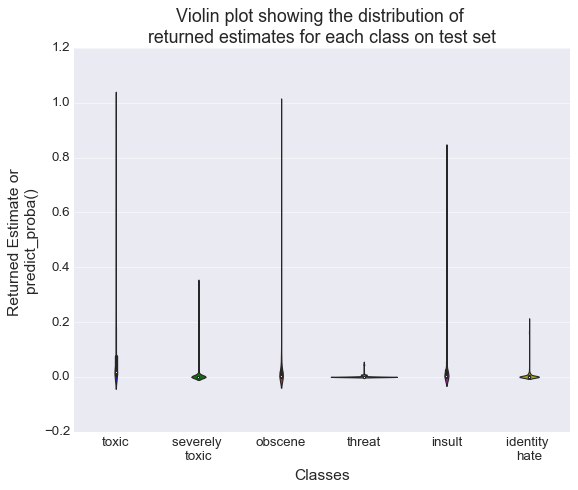

In [352]:
#plt.style.use('classic')
ax = sns.violinplot(x="label", y="probability", data=df_prob)
ax.set_title('Violin plot showing the distribution of \nreturned estimates for each class on test set', fontsize=16)
ax.set_xticklabels(('toxic', 'severely \ntoxic', 'obscene', 'threat', 'insult', 'identity \nhate'), fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Returned Estimate or \npredict_proba()', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.show()

#### Zoomed Version

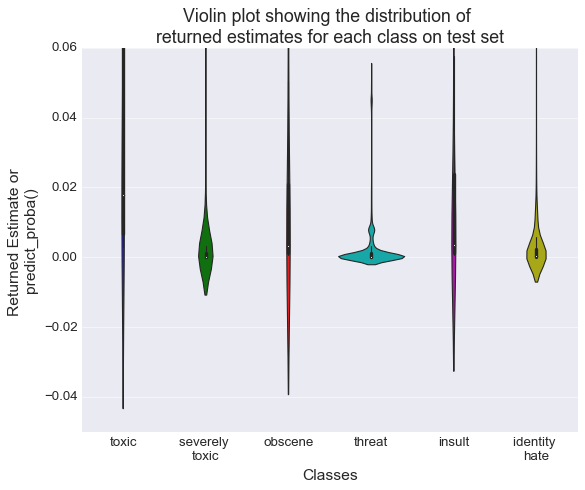

In [353]:
ax = sns.violinplot(x="label", y="probability", data=df_prob)
ax.set_title('Violin plot showing the distribution of \nreturned estimates for each class on test set', fontsize=16)
ax.set_xticklabels(('toxic', 'severely \ntoxic', 'obscene', 'threat', 'insult', 'identity \nhate'), fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Returned Estimate or \npredict_proba()', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylim(ymax=0.06)
plt.ylim(ymin=-0.05)
#plt.rcParams["figure.figsize"] = (4,2)
plt.show()

In [337]:
def getUniqueCounts(vals, num):
    unique, counts = np.unique(vals, return_counts=True)
    d = dict(zip(unique, counts))
    if num in d.keys():
        return d[num]
    else:
        return 0

In [338]:
actual_vals = np.empty(6)
predicted_vals = np.empty(6)
for i in range(6):
    actual_vals[i] = getUniqueCounts(y_test[:,i], 1)
    predicted_vals[i] = getUniqueCounts(predicted[:,i], 1)

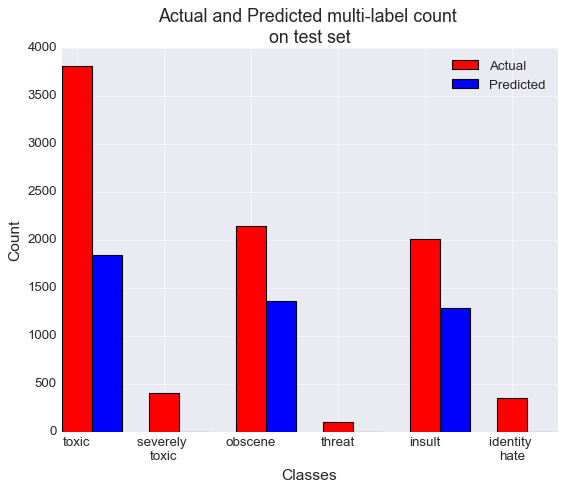

In [342]:
n = 6
width = 0.35

fig, ax = plt.subplots()
ind = np.arange(n)
p1 = ax.bar(ind, actual_vals, width, color='r', bottom=0)
p2 = ax.bar(ind+width, predicted_vals, width, color='b', bottom=0)

ax.set_title('Actual and Predicted multi-label count \non test set', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('toxic', 'severely \ntoxic', 'obscene', 'threat', 'insult', 'identity \nhate'), fontsize=12)

ax.legend((p1[0], p2[0]), ('Actual', 'Predicted'), fontsize=12)
ax.autoscale_view()
#plt.tick_params(axis='both', which='minor', labelsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Classes', fontsize=14)

plt.show()

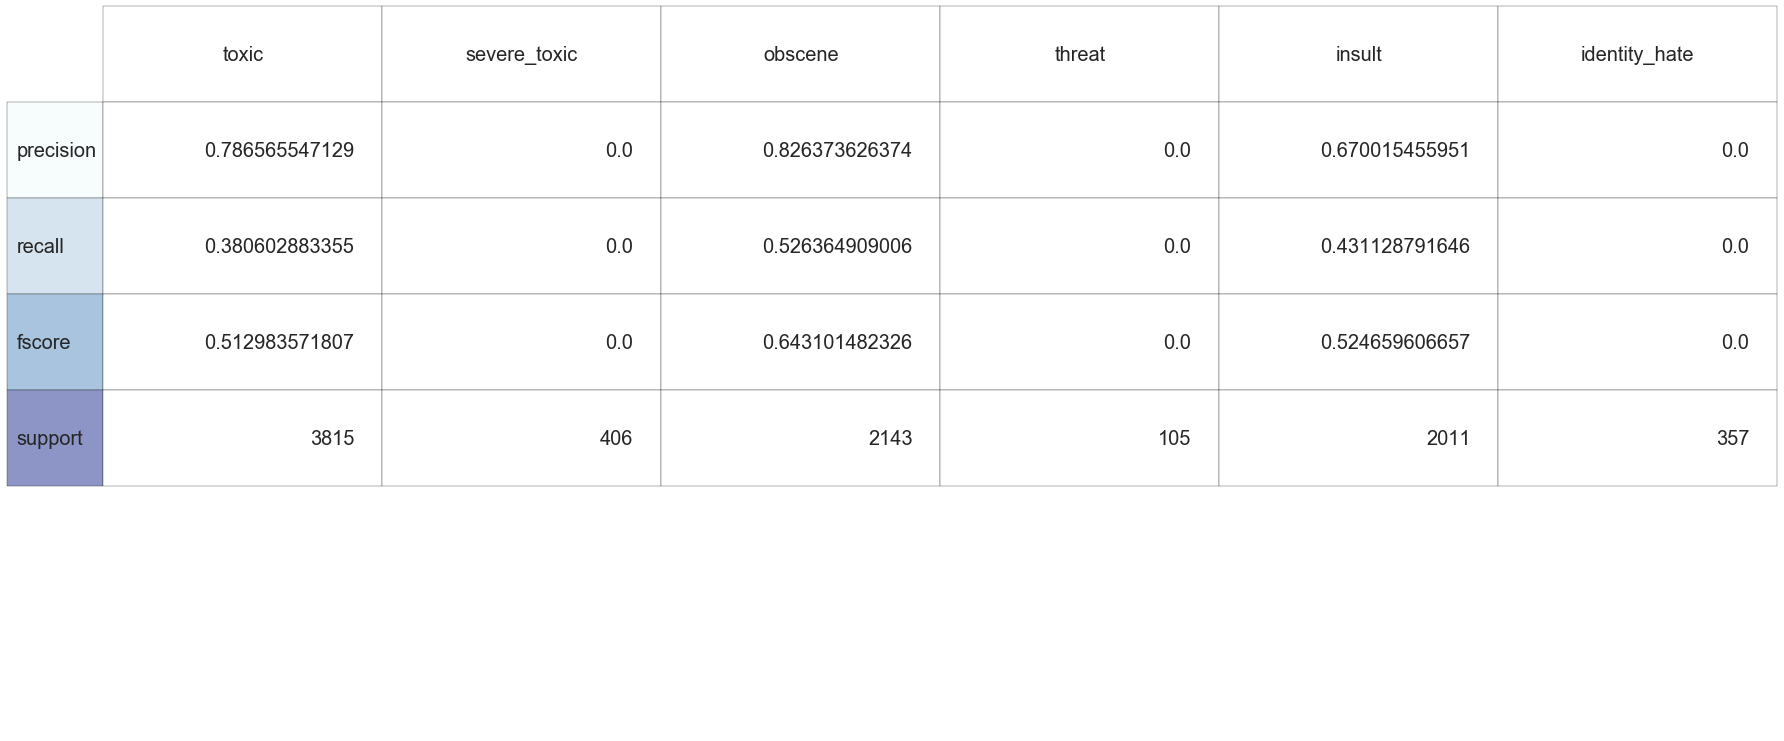

In [214]:
import warnings
warnings.filterwarnings("ignore")

precision, recall, fscore, support = all_score(y_test, predicted)
data = [precision, recall, fscore, support]
row_labels = ['precision', 'recall', 'fscore', 'support']
col_labels = np.array(list(target_labels.keys()))
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(row_labels)))

table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(20)
table.scale(5,8)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()

## Logistic Regression

In [219]:
from sklearn import linear_model
import itertools

### Represent multi-labels of each sample as a single class

#### Example
If a sample or a comment can be classified as a toxic, obscene, threat and identity hate then it can be represented in binary string as 101101. Similary there exists 64 posible binary strings ranging from 000000, 000001, ..., 111111.
    
To build the model and compute we represent each of the binary string with a corresponding number ranging from 0 to 63.

In [356]:
multi_label_map = {}
inv_label_map = {}
class_names = ['toxic', 'severely toxic', 'obscene', 'threat', 'insult', 'identity hate']
count = 0
for x in map(''.join, itertools.product('01', repeat=6)):
    multi_label_map[x] = count
    inv_label_map[count] = x
    count += 1

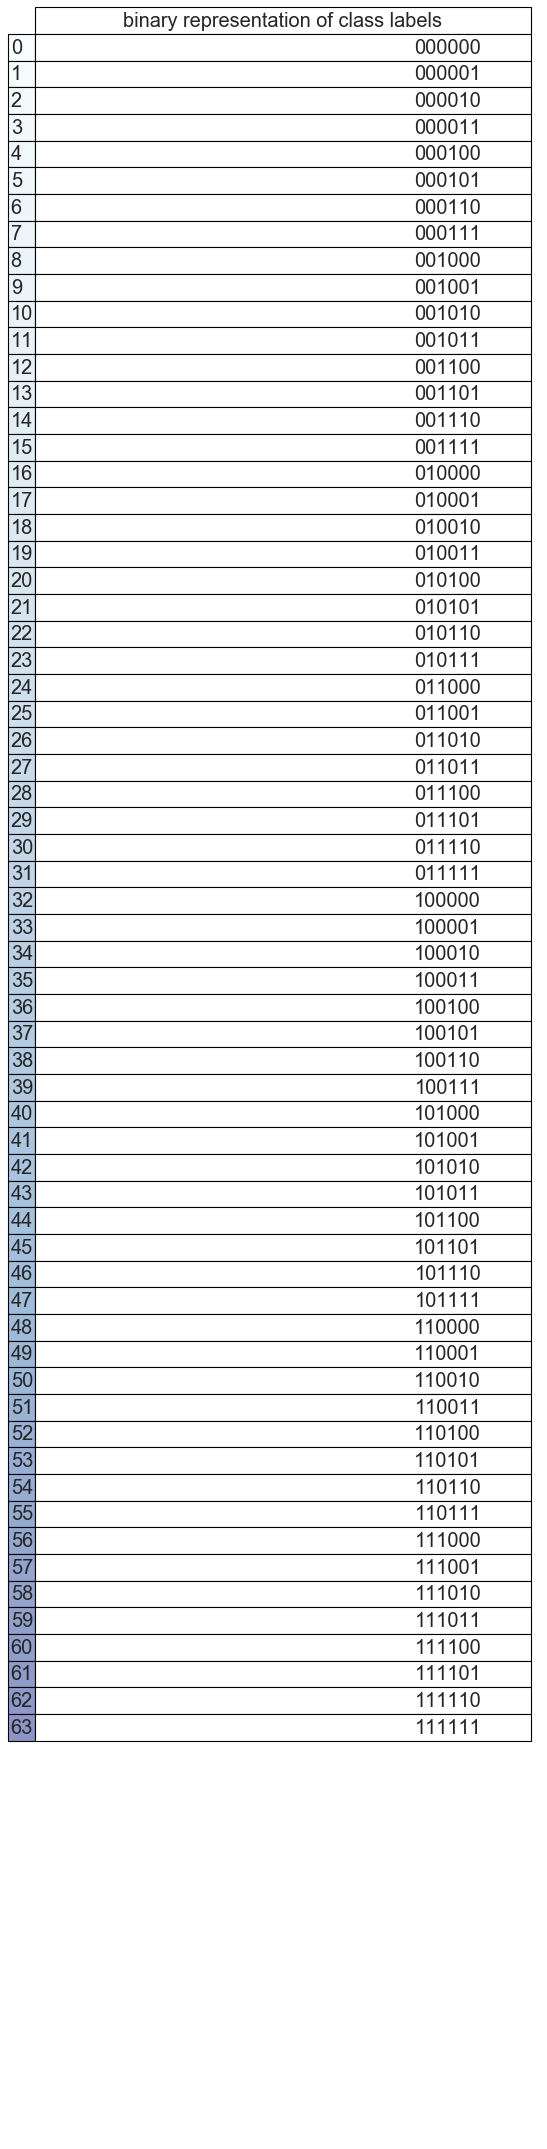

In [357]:
import warnings
warnings.filterwarnings("ignore")

int_keys = np.array(list(multi_label_map.keys()))
data = np.reshape(int_keys,(int_keys.size,1))
row_labels = np.array(list(inv_label_map.keys()))
col_labels = ['binary representation of class labels']
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(row_labels)))

table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(18)
table.scale(1, 2)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()

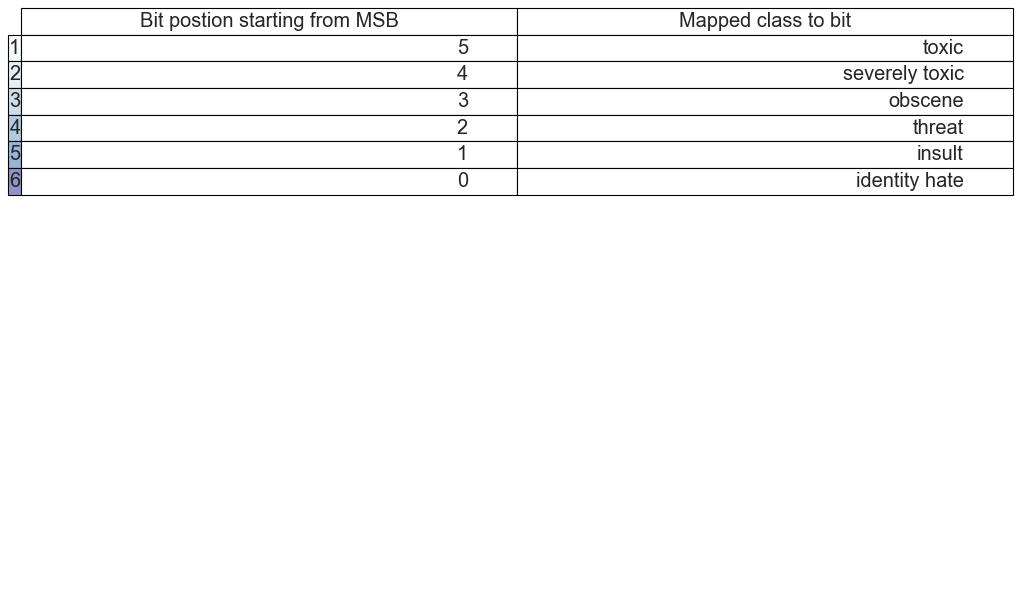

In [358]:
import warnings
warnings.filterwarnings("ignore")

int_keys = np.array(list(multi_label_map.keys()))
data = np.array([['5','toxic'], ['4','severely toxic'], ['3','obscene'], ['2','threat'], 
                 ['1','insult'], ['0','identity hate']]).reshape((6,2))
row_labels = [1,2,3,4,5,6]
col_labels = ['Bit postion starting from MSB', 'Mapped class to bit']
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(row_labels)))

table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(18)
table.scale(2, 2)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()

In [359]:
def getMergedLabels(data):
    sh = np.shape(data)
    new_data = np.empty(sh[0])
    no = 0
    for vector in data:
        bin_string = ''.join(str(int(round(x))) for x in vector)
        new_data[no] = multi_label_map[bin_string]
        no += 1
    return new_data

In [360]:
y_merged_train = getMergedLabels(y_train)
y_merged_test = getMergedLabels(y_test)

### Build machine learning model

In [361]:
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train,y_merged_train)

# mean accuracy on the given data and labels.
print("Training set score: %f" % lr.score(X_train, y_merged_train))
print("Test set score: %f" % lr.score(X_test, y_merged_test))

Training set score: 0.911028
Test set score: 0.910034


In [362]:
prediction = lr.predict(X_test)
print("Prediction")
print(prediction)

print("Accuracy of prediction")
print(accuracy_score(y_merged_test, prediction))

Prediction
[ 0.  0.  0. ...,  0.  0.  0.]
Accuracy of prediction
0.910034341864


In [363]:
def map_inverse(data):
    sh = np.shape(data)
    new_data = np.empty(sh[0])
    no = 0
    for val in data:
        new_data[no] = inv_label_map[val]
        no += 1
    return new_data

In [366]:
y_inv_test = map_inverse(y_merged_test)
pred_inv = map_inverse(prediction)
bin_repr = np.array(list(inv_label_map.keys()))
conf_mat = confusion_matrix(y_inv_test, pred_inv)
print("Confusion matrix")
print("******************")
print(conf_mat)

Confusion matrix
******************
[[35792     0     0 ...,     0     0     0]
 [   12     0     0 ...,     0     0     0]
 [   85     0     0 ...,     0     0     0]
 ..., 
 [    2     0     0 ...,     0     0     0]
 [    2     0     0 ...,     0     0     0]
 [    1     0     0 ...,     0     0     0]]


In [368]:
#
#    CONFUSION MATRIX VIA HEAT MAP CONSIDERING 64 CLASSES
#
# sns.set(font_scale=2.5)
# fig, ax = plt.subplots(figsize=(800,100))
# sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cmap = 'Blues_r', cbar=False,
#             xticklabels=bin_repr, yticklabels=bin_repr, linewidths=0.1, ax=ax)
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top') 
# plt.ylabel('Actual', fontsize=100)
# plt.xlabel('Predicted', fontsize=100)
# plt.show()

In [391]:
import warnings
warnings.filterwarnings("ignore")

precision0, recall0, fscore0, support0 = all_score(y_merged_test, prediction)
precision = [format(v, '.4f') for v in precision0]
recall = [format(v, '.4f') for v in recall0]
fscore = [format(v, '.4f') for v in fscore0]
support = [format(v, '.4f') for v in support0]

row_labels = ['precision', 'recall', 'fscore', 'support']
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(row_labels)))


#### Score table for first 16 labels 

In [398]:
data = [precision[:16], recall[:16], fscore[:16], support[:16]]
col_labels = bin_repr[:16]
plt.rcParams.update(plt.rcParamsDefault)
table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(220)
table.scale(60,120)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()

In [413]:
data = [precision[16:32], recall[16:32], fscore[16:32], support[16:32]]
col_labels = bin_repr[16:32]
table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(220)
table.scale(60,120)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [400]:
data = [precision[32:48], recall[32:48], fscore[32:48], support[32:48]]
col_labels = bin_repr[32:48]
table = plt.table(cellText=data, rowLabels=row_labels, rowColours=colors, 
          colLabels=col_labels,loc='top', clip_box='None')
table.set_fontsize(220)
table.scale(60,120)
cur_axes = plt.gca()
cur_axes.axis('off')
plt.show()